In [ ]:
# good job aleydis!
# next steps:
#   - move the selection of region to inside the function, so, no need to give input to the function
#   - lets hard code the relative directory of the data for now
#   - make a map plot af all data for all files found (within the function)
#   - inside the function, document it: description of what it does, what's the output, author and date
#   - clean your script so only the necesary cells are up front (keep the rest below, well separated)


In [1]:
#import necessary packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import warnings 
warnings.simplefilter('ignore') 
import os
import fnmatch

#load map packages
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from calendar import month_abbr

In [2]:
os.getcwd()

'/Users/sol/Documents/GitHub/2022_SummerInternship_FarallonInstitute/aleydis'

In [8]:
#os.chdir('../2022_SummerInternship_FarallonInstitute/saildrone_data')
os.chdir('../saildrone_data/')

In [7]:
os.listdir()

['saildrone-gen_5-arctic_misst_2019-sd1037-20190514T230000-20191011T183000-1_minutes-v1.1575487464625_JPLv5.0_8dy_20210613norep_20210613_20211116.nc',
 'saildrone_tpos_sd1029_2018_JPLv5.0_8dy_20210613norep_20210613_20211116.nc',
 'saildrone-gen_5-arctic_misst_2019-sd1036-20190514T230000-20191011T183000-1_minutes-v1.1575336154680_JPLv5.0_8dy_20210613norep_20210613_20211116.nc',
 'saildrone_tpos_sd1005_2018_JPLv5.0_8dy_20210613norep_20210613_20211116.nc',
 'saildrone_west_coast_survey_2018_sd1024_JPLv5.0_8dy_20210613norep_20210613_20211116.nc',
 'saildrone-gen_5-1021_atlantic-sd1021-20190525T000000-20191021T235959-1_minutes-v1.1571806429446_(1)_JPLv5.0_8dy_20210613norep_20210613_20211116.nc',
 'PMEL_Arctic_2016_sd126-ALL-1_min-v1_JPLv5.0_8dy_20210613norep_20210613_20211116.nc',
 'saildrone_west_coast_survey_2019_sd1038_JPLv5.0_8dy_20210613norep_20210613_20211116.nc',
 'PMEL_Arctic_2016_sd128-ALL-1_min-v1_JPLv5.0_8dy_20210613norep_20210613_20211116.nc',
 'saildrone_west_coast_survey_2019_

In [9]:
#variables: regions designated by number
west_coast = 1
arctic = 2
atlantic = 3
gulf_of_mexico = 4
pacific = 5

#user input needed for output of files
region = int(input("Enter the number of the desired region you'd like to see files from: "))

Enter the number of the desired region you'd like to see files from: 2


In [10]:
def select_region (region):
    #returns the list of files
    if (region == 1):
        file_list = []
        for file in os.listdir('.'):
            if fnmatch.fnmatch(file, '*west_coast*'):
                file_list.append(file)
        print (file_list)
    elif (region == 2):
        file_list = []
        for file in os.listdir('.'):
            if fnmatch.fnmatch(file, '*saildrone_arctic*'):
                file_list.append(file)
        print (file_list)
    elif (region == 3):
        file_list = []
        for file in os.listdir('.'):
            if fnmatch.fnmatch(file, '*saildrone-gen_5*'):
                file_list.append(file)
        print (file_list) 
    elif (region == 4):
        file_list = []
        for file in os.listdir('.'):
            if fnmatch.fnmatch(file, '*saildrone-gen_4*'):
                file_list.append(file)
        print (file_list)
    else:
        file_list = []
        for file in os.listdir('.'):
            if fnmatch.fnmatch(file, '*saildrone_tpos*'):
                file_list.append(file)
        print (file_list)



In [17]:
select_region(region)

['saildrone_arctic_sd1041_2019_JPLv5.0_8dy_20210613norep_20210613_20211116.nc', 'saildrone_arctic_sd1033_2019_JPLv5.0_8dy_20210613norep_20210613_20211116.nc', 'saildrone_arctic_sd1035_2019_JPLv5.0_8dy_20210613norep_20210613_20211116.nc', 'saildrone_arctic_sd1034_2019_JPLv5.0_8dy_20210613norep_20210613_20211116.nc', 'saildrone_arctic_2017_sd1002_JPLv5.0_8dy_20210613norep_20210613_20211116.nc', 'saildrone_arctic_2017_sd1003_JPLv5.0_8dy_20210613norep_20210613_20211116.nc', 'saildrone_arctic_2017_sd1001_JPLv5.0_8dy_20210613norep_20210613_20211116.nc']


In [15]:
#west coast sample datafile
ds2 = xr.open_dataset('/home/aleydisreyes/2022_SummerInternship_FarallonInstitute/saildrone_data/saildrone_west_coast_survey_2018_sd1024_JPLv5.0_8dy_20210613norep_20210613_20211116.nc')
ds2

TypeError: 'NoneType' object is not subscriptable

In [9]:
#outputting trajacetory of sample datafile
ds2.trajectory

<xarray.DataArray 'trajectory' ()>
array('1024.0', dtype=object)
Coordinates:
    trajectory  object '1024.0'
Attributes:
    axis:           E
    cf_role:        trajectory_id
    comment:        A trajectory is a single deployment of a drone
    long_name:      Trajectory/Drone ID
    point_spacing:  even

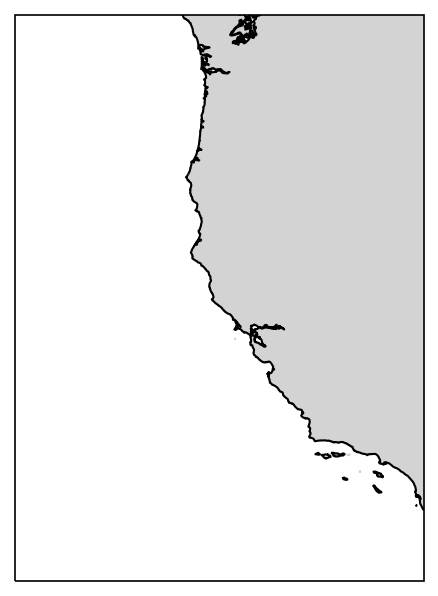

In [10]:
#west coast
fig=plt.figure(figsize=(12,5),dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-130,-117,30,48],crs=ccrs.PlateCarree())
#ax.set_xticks([-130,-125,-120], crs=ccrs.PlateCarree())
#ax.set_yticks([30,35,40,45,50], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, color='lightgrey')